# 8. 다이나믹 프로그래밍

## 실전 문제

### 1로 만들기 // RE(풀이 시간 초과)

#### 제한
* 풀이 시간 20분
* 시간 제한 1초
* 메모리 제한 128MB

#### 아이디어
* 5 나누기 한 것, 3 나누기 한 것, 2 나누기 한 것, 1 뺀 것 중 가능한 것을 모두 구해 그 중 가장 작은 값에 1을 더한 것이 해당 숫자의 최소 연산 수행 값이 된다.

#### 시간 복잡도
* min(cand)는 원소가 최대 4개 뿐이므로 상수 시간이 걸린다.
* 즉 반복문만 생각하면 되므로 O(N)이 되고, 여기서 N은 X를 의미하며, X는 최대 30,000이므로 1초 안에 해결이 가능하다.

#### 해설 본 후
* 굳이 2, 3, 5일 때 값을 주지 않아도 로직에 의해 알아서 들어간다. 생각을 잘 해보자.

In [ ]:
'''
숫자 - 연산
1 - 0
2 - 1
3 - 1
4 - 2 // 3-1 2-1
5 - 1
6 - 2 // 5-1 3-1- 2-1
7 - 3 // 6-
8 - 3 // 4-2-1
9 - 2 //

5로 나눠지면 1 + d[X//5]
3으로 나눠지면 1 + d[X//3]
2로 나눠지면 1 + d[X//2]
안 나눠지면 1 + d[X-1]
'''

In [12]:
# X 입력
X = int(input())

# 1부터 X까지의 정답 값을 구하기 위한 dp table 초기화
dp_table = [0] * (X+1)
# dp_table[2] = 1
# dp_table[3] = 1
# dp_table[5] = 1

# 2부터 X까지 돌면서
for i in range(2, X+1):
    # 가장 적은 연산을 찾기 위해 후보군을 담을 리스트 선언
    cand = []
    # 5로 나누어 떨어진다면 해당 수에서 5로 나눈 몫에 해당하는 수의 답에 1을 더해서 리스트에 삽입
    if i % 5 == 0:
        cand.append(1 + dp_table[i//5])
    # 3로 나누어 떨어진다면 해당 수에서 3로 나눈 몫에 해당하는 수의 답에 1을 더해서 리스트에 삽입
    if i % 3 == 0:
        cand.append(1 + dp_table[i//3])
    # 2로 나누어 떨어진다면 해당 수에서 2로 나눈 몫에 해당하는 수의 답에 1을 더해서 리스트에 삽입
    if i % 2 == 0:
        cand.append(1 + dp_table[i//2])
    # 2, 3, 5로 나누어 떨어지지 않는다면 해당 수에서 1을 뺀 값에 해당하는 수의 답에 1을 더해서 리스트에 삽입
    cand.append(1 + dp_table[i-1])
    
    # 후보군 중에서 가장 작은 값을 해당 수의 정답 값으로 설정
    dp_table[i] = min(cand)

# X의 정답값 출력
print(dp_table[X])

3


### 개미 전사

#### 제한
* 풀이 시간 30분
* 시간 제한 1초
* 메모리 제한 128MB

#### 아이디어
* 아래 코드 주석 참고

#### 시간 복잡도
* O(N)이고, N은 최대 100이므로 1초 내에 가능

#### 해설 본 후
* d[n-3] + foods[n]은 고려될 필요가 없다. 왜냐면 d[n-1]과 d[n-2]를 구하는 과정에서 이미 고려되기 때문이다.
    * 가령 아래 코드 주석의 4- 1 3 / 2 4 / 1 4 를 보면 1 4와 2 4에서 1과 2는 d[2]를 의미하고, 결국 둘 중에 더 큰 값이 d[2]가 되므로 계산 상에서는 똑같기(정확히는 더 높은 하나만 고려하게 되기) 때문이다.
* 즉, 점화식은 dp_table[n] = max(dp_table[n-2] + foods[n], dp_table[n-1])가 된다.

In [ ]:
'''
N은 3 이상 100 이하
d1 = foods[1]
d2 = max(foods[1], foods[2])
d3 = max(d[1] + food[3], d2)
d4 = max(d[2] + food[4], d3)

점화식
dn = max(d[n-2] + food[n], d[n-1])

아 아니다
-------------------------------------------------
1 - 1 ## d[1] = f[1]
2 - 1 / 2 ## d[2] = max(d[1], f[2])
3 - 1 3 / 2 ## d[3] = max(d[1] + f[3], d[2])
4- 1 3 / 2 4 / 1 4 ## d[4] = max(d[3], d[2] + f[4])
5 - 1 3 5 / 2 4 / 1 4
6 - 1 3 5 / 1 3 6 / 2 4 6 / 1 4 6
7 - 1 3 5 7 / 1 3 6 / 2 4 6 / 1 4 6 / 1 4 7 

큰 줄기
1. 마지막 식량 창고 터는 경우:
* d[n-2] + foods[n]
* d[n-3] + foods[n]
2. 마지막 식량 창고 안 터는 경우:
* d[n-1]

점화식
d[n] = max(d[n-2] + foods[n], d[n-3] + foods[n], d[n-1])
'''

In [1]:
# 식량 창고 개수 N 입력
N = int(input())

# 식량 창고에 저장된 식량 개수 정보 입력
foods = list(map(int, input().split()))

# 계산된 결과들을 저장하기 위한 dp 테이블 초기화
dp_table = [0] * N

# 1번째와 2번째 값을 수기로 넣어주고, 다이나믹 프로그래밍 진행
dp_table[0] = foods[0]
dp_table[1] = max(foods[0], foods[1])
# 3번째 원소(2번 인덱스)부터 쭉 돌면서 점화식대로 답을 dp 테이블에 저장
for i in range(2, N):
    dp_table[i] = max(dp_table[i-2] + foods[i], dp_table[i-3] + foods[i], dp_table[i-1]) 
    ## dp_table[i] = max(dp_table[i-2] + foods[i], dp_table[i-1]) 만 해도 된다. dp_table[i-3]은 어차피 i-2번째와 i-1번째를 구할 때 고려되기 때문이다

# 정답 출력
print(dp_table[N-1])

### 바닥 공사 // RE(풀이 시간 초과, 틀림)

#### 제한
* 풀이 시간 20분
* 시간 제한 1초
* 메모리 제한 128MB

#### 아이디어
* 주석 코드 및 그림 파일 참고 => (해설 본 후) 틀렸다.

#### 시간 복잡도
* O(N)이긴 한데... 틀렸다.

#### 해설 본 후
* 완전히 잘못 생각했다. 하나씩 붙여갈 것만 생각하고 그 안에 타일들을 2x2로 바꿀 생각을 안했다.
* 2번째 이미지 참고
* 점화식 세우기
    1. 왼쪽부터 i-1까지의 길이가 채워져 있으면 2x1 덮개를 채우는 하나의 경우만 존재 => d[i-1]개
    2. 왼쪽부터 i-2까지의 길이가 채워져 있으면 1x2 덮개 2개를 넣는 경우, 2x2 덮개 1개를 넣는 경우가 존재 => (2 * d[i-2])개
        * 이 때 2x1 덮개를 2개 넣는 경우를 뺀 이유는 이것이 1에서 고려되었기 때문.
    * 점화식: $a_i = a_{i-1} + 2 * a_{i-2}$ => d[n] = d[n-1] + 2 * d[n-2]

In [ ]:
'''
세로x가로
1x2 a, 2x1 b, 2x2 c
N 길이: 경우의 수
1: b1 - 1 / 1
2: b2, a2, c1 - 3 / 1 1 1
3: b3, b1a2, a2b1, b1c1, c1b1 - 5 / 1 2 2 ~ 2개가 늘고
4: b4, b2a2, b1a2b1, a2b2, b2c1, b1c1b1, c1b2, c2 - 7 / 1 3 3 1 ~ 2개가 늘고 1종 추가
5: b5, b3a2, b2a2b1, b1a2b2, a2b3, b3c1, b2c1b1, b1c1b2, c1b3, b1c2, c2b1 - 11 / 1 4 4 2 ~ 3개가 늘고
6: b6, b4a2, b3a2b1, b2a2b2, b1a2b3, a2b4, b4c1, b3c1b1, b2c1b2, b1c1b3, c1b4, b2c2, b1c2b1, c2b2, c3 - 15 / 1 5 5 3 1 ~ 3개가 늘고 1종 추가
7 ~ 4개가 늘고
8 ~ 4개가 늘고 1종 추가

n ~ n+1//2개가 늘고 짝수면 1종 추가

d[n] = d[n-1] + (n+1)//2 + 1 if n%2==0 else 0

-----------------
(해설 본 후) 이게 아니구나... 하나씩 붙여가기만 하고 모든 경우를 생각하지 못했다.

'''

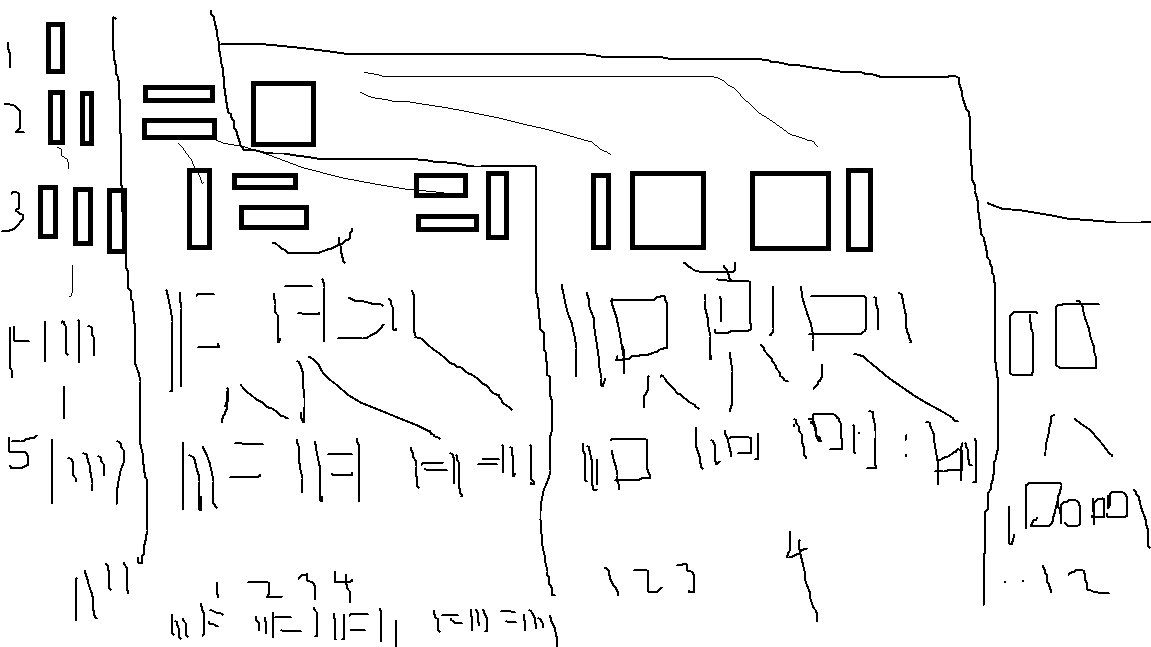

In [1]:
# 가로 길이 N 입력
N = int(input())

# 계산 결과를 저장하기 위한 dp 테이블 초기화
dp_table = [0] * N

# dp 진행을 위해 첫 번째와 두 번째 원소를 수기 입력
dp_table[0] = 1
dp_table[1] = 3

# 세운 점화식대로 다이나믹 프로그래밍 진행 
for i in range(2, N):
    dp_table[i] = dp_table[i-1] + (i+1)//2 + (1 if i%2==0 else 0)

# 정답 출력
print(dp_table[N-1]%796796)
# print(dp_table)

250501


#### 해설 코드 참고

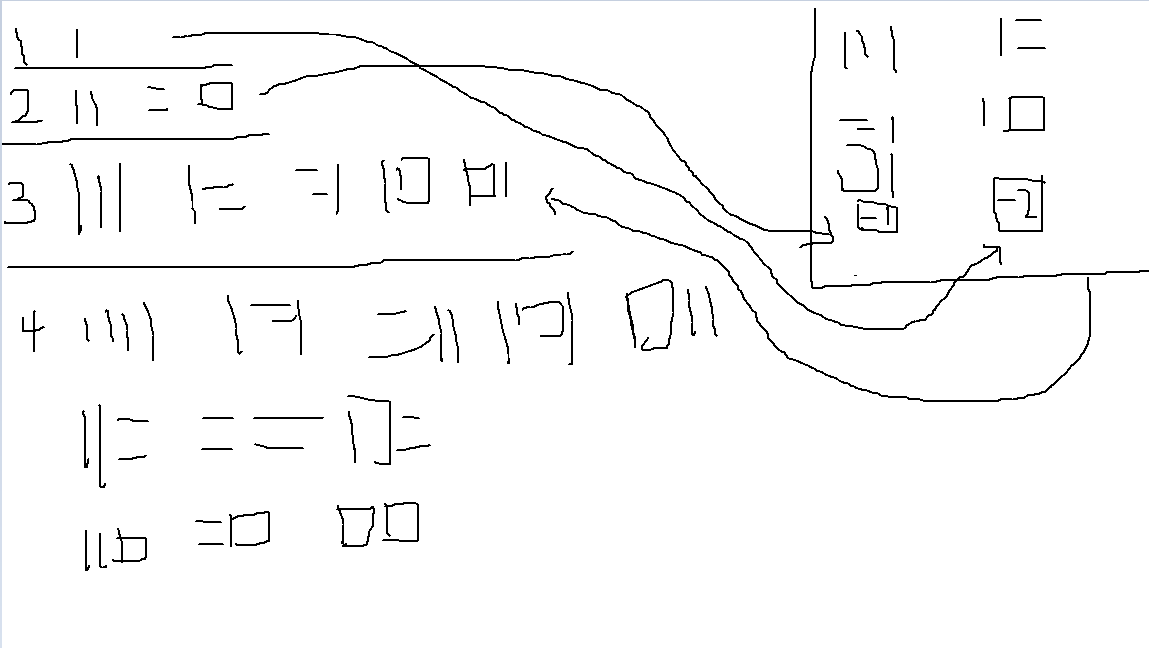

In [2]:
# 정수 N을 입력 받기
n = int(input())

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 1001

# 다이나믹 프로그래밍(Dynamic Programming) 진행(보텀업)
d[1] = 1
d[2] = 3
for i in range(3, n+1):
    d[i] = (d[i-1] + 2 * d[i-2])
    
# 계산된 결과 출력
print(d[n] % 796796)
# print(d)

184559


### 효율적인 화폐 구성 // RE(풀이 시간 초과, 해결 못 함)

#### 제한
* 풀이 시간 30분
* 시간 제한 1초
* 메모리 제한 128MB

#### 아이디어
* product 써볼까? => 시간이 너무 오래 걸릴 것 같고, 제대로 답을 찾으려면 결국 더 조치가 필요함
* 일일이 더해가면서? => 숫자 거치면 경우의 수 너무 많아 오래 걸릴 것 같음
* 힌트로 점화식을 봤다. 이를 이용하여 해결. 근데 답지가 더 효율적이다. M이 N의 최댓값보다 작은 경우가 있을 수 있으므로.

#### 시간 복잡도
* 힌트보고 짠건 아마 O(N*M)일 듯. N은 최대 100, M은 최대 10,000이므로 시간 내에 해결 가능
* 답지도 내 풀이와 빅오표기법상 시간 복잡도는 비슷하지만, 불필요한 연산을 줄여 더 효율적이다.

#### 해설 본 후
* 점화식을 생각해내는 게 어렵다...

In [ ]:
'''
0 0 / x
1 0
2 1 / 2 / 0+2
3 1 / 3 / 0+3
4 2 / 2 2 / 2+2
5 2 / 2 3 / 2+3
6 2 / 3 3 / 3+3
7 3 / 2 2 3 / 4+3, 5+2
8 3 / 2 3 3 / 5+2, 6+2
9 3 / 3 3 3 / 6+3
10 4 / 2 2 3 3 / 7+3, 8+2
11 4 / 2 3 3 3
12 4 / 3 3 3 3
13 5 / 2 2 3 3 3
14 5 / 2 3 3 3 3
15 5 / 3 3 3 3 3
'''

#### try

In [1]:
# 화폐 종류 가지수 N과 목표 가치 M 입력
N, M = map(int, input().split())

# 화폐 가치 종류 입력
moneys = []
for _ in range(N):
    moneys.append(int(input()))

In [5]:
# 정답 기록을 위한 dp 테이블 선언
dp_table = [0] * (M+1)

# # 만들 수 있는 금액들
# can_make = []

# 하나의 화폐로 만들 수 있는 금액들 초기화
for money in moneys:
    dp_table[money] = 1

    
for i in range(N):
    for j in range(i, N):
        if 

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
from itertools import product

list(product(moneys, repeat=3))

[(2, 2, 2),
 (2, 2, 3),
 (2, 3, 2),
 (2, 3, 3),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 2),
 (3, 3, 3)]

In [34]:
## 힌트 보고 풂

# 화폐 종류 가지수 N과 목표 가치 M 입력
N, M = map(int, input().split())

# 화폐 가치 종류 입력
moneys = []
for _ in range(N):
    moneys.append(int(input()))

# 정답 기록을 위한 dp 테이블 선언
dp_table = [10001] * max(M+1, max(moneys)+1)

# 하나의 화폐로 만들 수 있는 금액들 초기화
for money in moneys:
    dp_table[money] = 1

# 0원부터 목표 가치까지 돌면서 확인
for i in range(M+1):
    # 모든 종류의 화폐를 사용하여
    for k in moneys:
        # 확인하는 금액이 지금 확인하는 화폐 가치보다 크거나 같으면
        if i >= k:
            # 확인하는 금액의 기존 dp 테이블 값과 지금 확인하는 화폐 가치를 뺀 금액의 dp 테이블값에 1을 더한 것 중 작은 것으로 dp 테이블값을 갱신
            dp_table[i] = min(dp_table[i], dp_table[i-k]+1)

# 목표 가치 금액을 만들 수 있다면 이를 만들기 위한 최소한의 화폐 개수를 출력, 만들 수 없다면 -1 출력
print(dp_table[M] if dp_table[M] != 10001 else -1)

5


#### 해설 코드 참고

In [45]:
# 정수 N, M 입력
n, m = map(int, input().split())
# N개의 화폐 단위 정보를 입력받기
array = []
for i in range(n):
    array.append(int(input()))

# 한 번 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [10001] * (m+1)

# 다이나믹 프로그래밍 진행(보텀업)
d[0] = 0
for i in range(n):
    for j in range(array[i], m+1):
        if d[j - array[i]] != 10001: # (i-k)원을 만드는 방법이 존재하는 경우 => 없어도 됨
            d[j] = min(d[j], d[j - array[i]] + 1)

# 계산된 결과 출력
if d[m] == 10001: # 최종적으로 M원을 만드는 방법이 없는 경우
    print(-1)
else:
    print(d[m])

-1


## Q31. 금광

#### 제한
* 풀이 시간 30분
* 시간 제한 1초
* 메모리 제한 128MB

#### 아이디어
* bfs로도 할 수 있지 않나?
* 일단 dp테이블을 이중 리스트로 하면 가능할 것 같다. 시도해보자.

#### 시간 복잡도
* O(T * m * n) 일 듯
* T는 최대 1000, n과 m은 최대 20이므로 1초 내에 가능

#### 해설 본 후
* 구현 편의상 금 정보를 담은 이중 리스트를 따로 만들지 않고 바로 dp 테이블에 담아 진행해도 된다.
* 현재 위치의 금은 max값 밖에서 더해주는 게 코드를 더 가독성 있게 짜는 방법이다.
* 1차원 리스트를 2차원 리스트로 변환할 때 답지의 코드가 더 간단한 것 같다. 참고하자.
* 답지 dp 실행 부분의 가독성이 좋다. 참고하자.

In [ ]:
'''
이전 열에서 올 때 위 행에서 오는지, 같은 행에서 오는지, 아래 행에서 오는지를 체크하여 max 해주기

d[0][1] = max(d[0][0] + g[0][1], d[1][0] + g[0][1])
d[1][1] = max(d[0][0] + g[1][1], d[1][0] + g[1][1], d[2][0] + g[1][1])
d[2][1] = max(d[1][0] + g[2][1], d[2][0] + g[2][1])

'''

In [12]:
# 테스트 케이스 T의 개수만큼 수행
for _ in range(int(input())):
    # 금광 크기 n, m과 금 정보 입력
    n, m = map(int, input().split())
    golds = list(map(int, input().split()))
    
    # 금광을 이중 리스트로 선언
    mine = [[] for _ in range(n)]
    for i in range(n*m):
        quotient, remainder = divmod(i, m)
        mine[quotient].append(golds[i])
    
    # dp 테이블 선언
    dp_table = [[0]*m for _ in range(n)]

    # 첫 열의 값을 해당 열의 금의 크기로 초기화
    for i in range(n):
        dp_table[i][0] = mine[i][0]

    # dp 실행
    for y in range(1, m):
        for x in range(n):
            gold = mine[x][y]
            if x == 0:
                dp_table[x][y] = max(dp_table[x][y-1] + gold, dp_table[x+1][y-1] + gold)
            elif x == n-1:
                dp_table[x][y] = max(dp_table[x-1][y-1] + gold, dp_table[x][y-1] + gold)
            else:
                dp_table[x][y] = max(dp_table[x-1][y-1] + gold, dp_table[x][y-1] + gold, dp_table[x+1][y-1] + gold)
        
    # 정답 변수 선언        
    answer = 0
    # 마지막 열의 값을 비교하여 가장 큰 것을 정답으로 선언
    for i in range(n):
        answer = max(answer, dp_table[i][m-1])
    
    # 정답 출력
    print(answer)
    

19
16


#### 해설 코드 참고

In [ ]:
# 테스트 케이스 입력
for tc in range(int(input())):
    # 금광 정보 입력
    n, m = map(int, input().split())
    array = list(map(int, input().split()))
    
    # 다이나믹 프로그래밍을 위한 2차원 DP 테이블 초기화 => 이 부분! 내 코드보다 더 직관적인 것 같다
    dp = []
    index = 0
    for i in range(n):
        dp.append(array[index : index + m])
        index += m
    
    # 다이나믹 프로그래밍 진행
    for j in range(1, m):
        for i in range(n):
            # 왼쪽 위에서 오는 경우
            if i == 0:
                left_up = 0
            else:
                left_up = dp[i-1][j-1]
            # 왼쪽 아래에서 오는 경우
            if i == n-1:
                left_down = 0
            else:
                left_down = dp[i-1][j-1]
            # 왼쪽에서 오는 경우
            left = dp[i][j-1]
            
            dp[i][j] = dp[i][j] + max(left_up, left_down, left)
            
    result = 0
    for i in result(n):
        result = max(result, dp[i][m-1])
    
    print(result)

## Q32. 정수 삼각형 // RE(풀이 시간 초과)
https://www.acmicpc.net/problem/1932

#### 제한
* 풀이 시간 30분
* 시간 제한 2초
* 메모리 제한 128MB

#### 아이디어
* n행 기준, n-1행에서 왼쪽 위에서 오는 것, 위에서 오는 것, 오른쪽 위에서 오는 것을 max()하기. 이 때 행의 첫 열과 끝 열에 있는 경우는 예외 처리가 필요
* 문제를 잘못 봤다. 삼각형의 형태를 제대로 안 보고 문제를 풀었다. 그러니 답이 안 나오지. => 그림상 왼쪽 위(리스트 상 왼쪽 위), 오른쪽 위(리스트 상 바로 위)를 고려해야 함

#### 시간 복잡도
* O(n^2). n은 최대 500이므로 시간 내에 해결 가능

#### 해설 본 후
* tri라는 변수를 안 쓰고 바로 dp_table에 넣어서 해도 된다. 그게 메모리 면에서 더 효율적.

In [ ]:
'''
7
3 8 /
8 1 0 /
2 7 4 4 /
4 5 2 6 5 /
'''

'''
7
10 15
18 16 15
20 25 20 19
24 30 27 26 24
'''

In [12]:
# 삼각형의 크기 n 입력
n = int(input())

# 정수 삼각형의 정보 입력
tri = []
for _ in range(n):
    tri.append(list(map(int, input().split())))

# dp 테이블 초기화
dp_table = [[] for _ in range(n)]

# dp 테이블의 첫 행을 정수 삼각형의 첫 행으로 초기화
dp_table[0] = tri[0]

# dp 진행
# 두번째 행부터 끝 행까지 돌면서
for i in range(1, n):
    # 첫 번째 열부터 끝 열까지 돌면서
    for j in range(i+1):
        # 첫 열이면 왼쪽 위에서 오는 게 없으므로 0, 아니라면 이전까지 제일 컸던 값으로
        if j == 0:
            left_up = 0
        else:
            left_up = dp_table[i-1][j-1]
        # 끝 열이면 오른쪽 위에서 오는 게 없으므로 0, 아니라면 이전까지 제일 컸던 값으로
        if j == i:
            right_up = 0
        else:
            right_up = dp_table[i-1][j]
        
        # 해당 행, 열에서 정수 삼각형에 주어진 값에 이전 경로까지의 가장 컸던 값을 더해 새로 할당
        dp_table[i].append(tri[i][j] + max(left_up, right_up))

# 정답 출력
print(max(dp_table[n-1]))

30


## Q33. 퇴사
https://www.acmicpc.net/problem/14501

#### 제한
* 풀이 시간 30분
* 시간 제한 2초
* 메모리 제한 512MB

#### 아이디어
* 

#### 시간 복잡도
* 

#### 해설 본 후
* 

## Q34. 병사 배치하기
https://www.acmicpc.net/problem/18353

#### 제한
* 풀이 시간 40분
* 시간 제한 1초
* 메모리 제한 256MB

#### 아이디어
* 

#### 시간 복잡도
* 

#### 해설 본 후
* 